In [33]:
#imports libraries necessary for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_log_error, median_absolute_error

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold,cross_validate, cross_val_score,LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report,roc_curve,auc,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [34]:
#reading the data 
df=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\Task_26-06\Salary_Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


##### *Understanding the data and its distribution*

In [35]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


##### *Data cleaning & Feature Engineering*

*Since the data does not have any unique id or we will not remove duplicates*

In [37]:
#checkking whether there is any na values in the data
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [38]:
#finding rows where education level is na 
df[df['Education Level'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0


In [39]:
#drop rows where all values are na
df=df.dropna(how='all',axis=0)
#checking the na values in data after dropping 
df.isna().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    1
Salary                 3
dtype: int64

In [40]:
#labels in eductaion distribution in the data
edu=df.value_counts(df['Education Level'])
print(edu)

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
dtype: int64


In [41]:
#found multiple category labels, combined and mapped them
map_var={"High School":1,"Bachelor's Degree":2,"Bachelor's":2,"Master's Degree":3,"Master's":3,"PhD":4,"phD":4}
df['Education'] = df['Education Level'].transform(lambda x: x.map(map_var))
df['Education'].unique()
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,2.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,3.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,4.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,2.0
4,52.0,Male,Master's,Director,20.0,200000.0,3.0


In [42]:
df[df['Salary'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,3.0
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,2.0
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,2.0


In [43]:
#fill the missing salary considering the job title and eductaion
df['Salary']=df.groupby(['Job Title','Education'])['Education'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df[df['Salary'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education
2011,27.0,Male,NaN,Developer,7.0,NaN,NaN


In [44]:
#dropping the rows where still na values are present 
df.dropna(axis=0,inplace=True)
df.isna().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Education              0
dtype: int64

In [45]:
#The gender labels are changed to numercal values using LabelEncoder method
df['Gender']=LabelEncoder().fit_transform(df['Gender']) #male as 1, female 0 and others and 2
print("No of unique jobs titles are: ",df['Job Title'].nunique())
#The lables under job title are changed to numercal values using LabelEncoder method
df['Job Title']=LabelEncoder().fit_transform(df['Job Title']) 
df.info()

No of unique jobs titles are:  191
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6700 non-null   float64
 1   Gender               6700 non-null   int32  
 2   Education Level      6700 non-null   object 
 3   Job Title            6700 non-null   int32  
 4   Years of Experience  6700 non-null   float64
 5   Salary               6700 non-null   float64
 6   Education            6700 non-null   float64
dtypes: float64(4), int32(2), object(1)
memory usage: 366.4+ KB


##### *Applying regression model*


*NOTE: The given data is giving a well balanced model without even applying any kind of regularization or any control variables.*

*I will be applying 3 different regression models in ML*
- *Linear Reagression*
- *Decision Tree Regression*
- *Random Forest Regression*


**1. Linear Regression**

In [46]:
#Assigning the dependent and independent variables 
X=df[['Age','Gender','Education','Job Title','Years of Experience']]
Y=df['Salary']

In [47]:
#Different train sizes to try
train_sizes = [0.7, 0.8, 0.9]  

for i in train_sizes:
    #Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=i, random_state=33)
    
    #Tcreate the model and predict
    model = LinearRegression().fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Calculate mean squared error (MSE) for testing data
    test_error=mean_squared_error(Y_test, Y_pred)

    print("Train Size:",i,"Testing Error:", test_error)
   


Train Size: 0.7 Testing Error: 9.8924040567967e-31
Train Size: 0.8 Testing Error: 4.2812058990346735e-29
Train Size: 0.9 Testing Error: 1.19478944705174e-30


**2. Decision Tree Regression**

In [48]:
#Different train sizes to try
train_sizes = [0.7, 0.8, 0.9]  

for i in train_sizes:
    #Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=i, random_state=33)
    
    #Tcreate the model and predict
    model = DecisionTreeRegressor().fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Calculate mean squared error (MSE) for testing data
    test_error=mean_squared_error(Y_test, Y_pred)
    test_error2=mean_absolute_error(Y_test, Y_pred)

    print("Train Size:",i,"Testing Error (MSE):", test_error)
    print("Train Size:",i,"Testing Error(MAE):", test_error)

Train Size: 0.7 Testing Error (MSE): 0.0
Train Size: 0.7 Testing Error(MAE): 0.0
Train Size: 0.8 Testing Error (MSE): 0.0
Train Size: 0.8 Testing Error(MAE): 0.0
Train Size: 0.9 Testing Error (MSE): 0.0
Train Size: 0.9 Testing Error(MAE): 0.0


*The decison tree regressor model was able to predict the target variable without any error. Checked error using MAE and MSE*

**3: Random Forest Regression**

In [49]:
#Different train sizes to try
train_sizes = [0.7, 0.8, 0.9]  

for i in train_sizes:
    #Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=i, random_state=33)
 
    #Tcreate the model and predict
    model=RandomForestRegressor().fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Calculate mean squared error (MSE) for testing data
    test_error=mean_squared_error(Y_test, Y_pred)
    test_error2=mean_absolute_error(Y_test, Y_pred)

    print("Train Size:",i,"Testing Error (MSE):", test_error)
    print("Train Size:",i,"Testing Error(MAE):", test_error)

Train Size: 0.7 Testing Error (MSE): 0.0
Train Size: 0.7 Testing Error(MAE): 0.0
Train Size: 0.8 Testing Error (MSE): 0.0
Train Size: 0.8 Testing Error(MAE): 0.0
Train Size: 0.9 Testing Error (MSE): 0.0
Train Size: 0.9 Testing Error(MAE): 0.0


*Similar to decison tree regressor model, random forest regression is also able to predict the target variable without any error. Checked error using MAE and MSE*

#### Classification

In [50]:
#For the ease of understanding I am using only the train data from car insureance related data and splitting that for building model
#reading the data
df_train=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\Task_26-06\\train.csv")

In [51]:
#understanding the data types and variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

<Axes: >

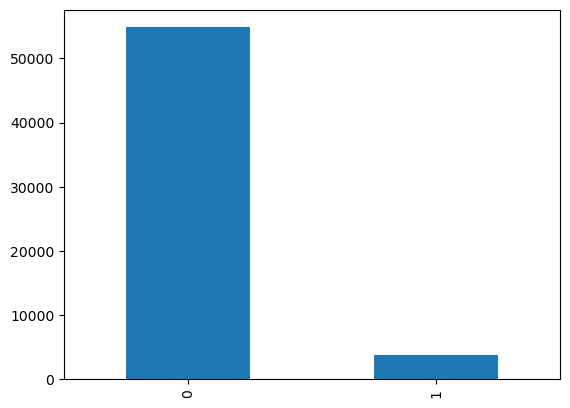

In [52]:
#checking the distribution of target value
df_train["is_claim"].value_counts().plot.bar()

*The distrution is found to be unequal/imbalanced*

In [53]:
df_train.shape

(58592, 44)

*In the previous analysis we found that there is no null values or duplicated values in the data*

In [54]:
#Scaling the variable population density
df_train['population_density']= df_train['population_density'].to_numpy().reshape(-1, 1)
df_train['population_density']=StandardScaler().fit_transform(df_train[['population_density']])

##### Applying classification model

In [55]:
#setting the independent variables and dependent variables
X=df_train.drop(["is_claim","policy_id"],axis=1)
X=X.apply(LabelEncoder().fit_transform)

Y=df_train['is_claim']

*Before moving to other validation methods the imbalance in target variable is balanced using SMOTE.*

In [56]:
# Split the data into training and testing sets (70:20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=33)

# Before moving into further apply SMOTE to the data in order to avoid the imbalance in target variable
smote=SMOTE(random_state=33)
X_train,Y_train=smote.fit_resample(X_train, Y_train)

*As model validation method we will use train test split, Kfold cross validation and leave one out validation methods*.

*For model validation metrics we will use confusion matrix, accuraacy, precision, recall, f1 score and roc curve*

**1: Train-Test Split**

*Understanding validation metrics*

- Decision Tree classification

In [57]:

#information gain condition for feature selection 
#Decision tree based prediction where the criterion is set to 'entropy'
#Fit the decision tree model on the training fold

# Split the data into training and testing sets (80:20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=33)

dt=DecisionTreeClassifier(criterion='entropy').fit(X_train,Y_train)
Y_pred=dt.predict(X_test)

confusion_mat = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(confusion_mat)
plt.show()
print("")
print("Testing Classification Report:")
print(classification_report(Y_test, Y_pred))

Confusion Matrix:
[[10236   752]
 [  656    75]]

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10988
           1       0.09      0.10      0.10       731

    accuracy                           0.88     11719
   macro avg       0.52      0.52      0.52     11719
weighted avg       0.89      0.88      0.88     11719



*The confusion meatrix shows the TP, TN, FP and FN.The precision, recall and accuracy can be noted from th clasification report.*

*Plotting **roc curve** and determining the value of **area under the curve (auc)** from decision tree classification*

In [58]:
fpr, tpr, thresholds=roc_curve(Y_test,Y_pred,pos_label=1)
auc =auc(fpr, tpr)
auc

0.5170804414416523

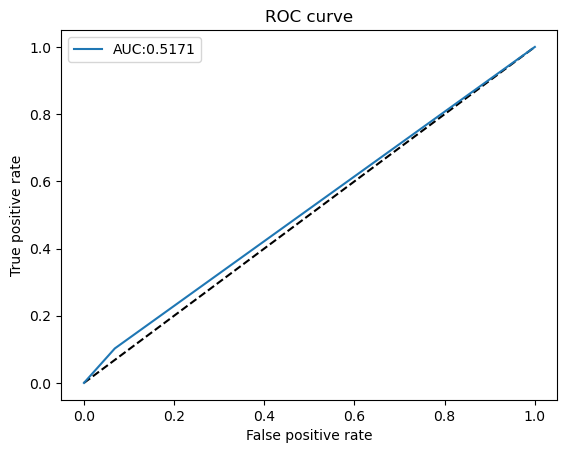

In [59]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'AUC:{:.4f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

*The shape of roc curve is linear, which is not a good one. And the auc value is slightly greater than 0.5 (0.5131).These signifies the model is not a good fit model.*

- Random Forest classification

In [60]:
#Applying random forest classifier with different train test split ratio
#Different train sizes to try
train_sizes = [0.7, 0.8, 0.9]  

for i in train_sizes:
    #Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=i, random_state=33)
    
    #Tcreate the model and predict
    model=RandomForestClassifier().fit(X_train, Y_train)
    Y_pred=dt.predict(X_test)

    confusion_mat = confusion_matrix(Y_test, Y_pred)

    print("Confusion Matrix:Train size=",i)
    print(confusion_mat)    
    print("")
    print("Testing Classification Report:Trainsize=",i)
    print(classification_report(Y_test, Y_pred))

Confusion Matrix:Train size= 0.7
[[15726   752]
 [  656   444]]

Testing Classification Report:Trainsize= 0.7
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     16478
           1       0.37      0.40      0.39      1100

    accuracy                           0.92     17578
   macro avg       0.67      0.68      0.67     17578
weighted avg       0.92      0.92      0.92     17578

Confusion Matrix:Train size= 0.8
[[10236   752]
 [  656    75]]

Testing Classification Report:Trainsize= 0.8
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10988
           1       0.09      0.10      0.10       731

    accuracy                           0.88     11719
   macro avg       0.52      0.52      0.52     11719
weighted avg       0.89      0.88      0.88     11719

Confusion Matrix:Train size= 0.9
[[5128  378]
 [ 321   33]]

Testing Classification Report:Trainsize= 0.9
              precis

*As the training size increased, the score metrics almost all of them has been decreased.*

*Similar observation has been found for logistic regression model also.*

In [61]:
#Applying *logistic regression* classifier with different train test split ratio
#Different train sizes to try
train_sizes = [0.7, 0.8, 0.9]  

for i in train_sizes:
    #Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=i, random_state=33)
    
    #Tcreate the model and predict
    model=LogisticRegression().fit(X_train, Y_train)
    Y_pred=dt.predict(X_test)

    confusion_mat = confusion_matrix(Y_test, Y_pred)

    print("Confusion Matrix:Train size=",i)
    print(confusion_mat)    
    print("")
    print("Testing Classification Report:Trainsize=",i)
    print(classification_report(Y_test, Y_pred))

Confusion Matrix:Train size= 0.7
[[15726   752]
 [  656   444]]

Testing Classification Report:Trainsize= 0.7
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     16478
           1       0.37      0.40      0.39      1100

    accuracy                           0.92     17578
   macro avg       0.67      0.68      0.67     17578
weighted avg       0.92      0.92      0.92     17578

Confusion Matrix:Train size= 0.8
[[10236   752]
 [  656    75]]

Testing Classification Report:Trainsize= 0.8
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10988
           1       0.09      0.10      0.10       731

    accuracy                           0.88     11719
   macro avg       0.52      0.52      0.52     11719
weighted avg       0.89      0.88      0.88     11719

Confusion Matrix:Train size= 0.9
[[5128  378]
 [ 321   33]]

Testing Classification Report:Trainsize= 0.9
              precis

**2: K-Fold cross Validation**

In [62]:
#models to apply
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()] 

#the number of folds for K-fold cross-validation
k=10 

# Create an empty dataframe to store the results
results =pd.DataFrame(columns=['Model','Accuracy'])

# Perform K-fold cross-validation for each model
for model in models:
    accuracy = cross_val_score(model, X, Y, cv=k, scoring='accuracy').mean()
    results = results.append({'Model': type(model).__name__, 'Accuracy': accuracy}, ignore_index=True)

# Print the results table
print("Validation Method: K-Fold Cross Validation")
print(results)


Validation Method: K-Fold Cross Validation
                    Model  Accuracy
0      LogisticRegression  0.936032
1  DecisionTreeClassifier  0.870870
2  RandomForestClassifier  0.931783


**2: Leave One Out Method**

*Couldn't implemnt leave one out method as it was taking huge time to process (kernel interrupted at 62.13 mins)*

In [ ]:
#models to apply
models =[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()] 

#Create an empty dataframe to store the results
results =pd.DataFrame(columns=['Model', 'Accuracy'])
 
#Perform K-fold cross-validation for each model
for model in models:
    loo=LeaveOneOut()
    accuracy = cross_val_score(model,X,Y,cv=loo,scoring='accuracy').mean()
    results = results.append({'Model': type(model).__name__, 'Accuracy': accuracy}, ignore_index=True)

# Print the results table
print("Validation Method: Leave-One-Out")
print(results)

In [ ]:
#models to apply
models=[LogisticRegression()] 

#Create an empty dataframe to store the results
results =pd.DataFrame(columns=['Model', 'Accuracy'])

#Perform K-fold cross-validation for each model
for model in models:
    loo=LeaveOneOut()
    accuracy = cross_val_score(model,X,Y,cv=loo,scoring='accuracy').mean()
    results = results.append({'Model': type(model).__name__, 'Accuracy': accuracy}, ignore_index=True)

# Print the results table
print("Validation Method: Leave-One-Out")
print(results)